<a href="https://colab.research.google.com/github/suzzini/DA_Study/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 사이킷럿 파이프라인(Pipelines)
- DecisionTree



In [2]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import graphviz
from sklearn.tree import export_graphviz

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df=pd.read_csv('heart.csv')
# https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [13]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.T.duplicated()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [15]:
from sklearn.model_selection import train_test_split

target='output'
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)
#train, test의 비율 8/2
#훈련데이터를 나눌 때 무작위로 샘플링을 하되, original dataset의 클래스 비율이 train, test set에서도 동일하게 유지되는 것을 보장한다

train.shape, test.shape

((242, 14), (61, 14))

#### 타켓의 비율 확인하기

In [16]:
train[target].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: output, dtype: float64

In [18]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

## 사이킷럿 파이프라인(Pipelines)

- 여러 ML 모델을 같은 전처리 프로세스에 연결시킬 수 있음
- 그리드서치(grid search)를 통해 여러 하이퍼파라미터를 쉽게 연결할 수 있음

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
model_lr = LogisticRegression(n_jobs=-1)

X_train_scaled = scaler.fit_transform(X_train)
model_lr.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print('테스트세트 정확도', model_lr.score(X_test_scaled, y_test))

테스트세트 정확도 0.7868852459016393


In [21]:
#파이프라인 이용하기

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(n_jobs=-1)
)

pipe.fit(X_train,y_train)

print('테스트세트 정확도', pipe.score(X_test, y_test))

테스트세트 정확도 0.7868852459016393


In [23]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [24]:
#pipe 각 스텝에 접근하기
pipe.named_steps

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=-1, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### 회귀계수 그래프 확인하기

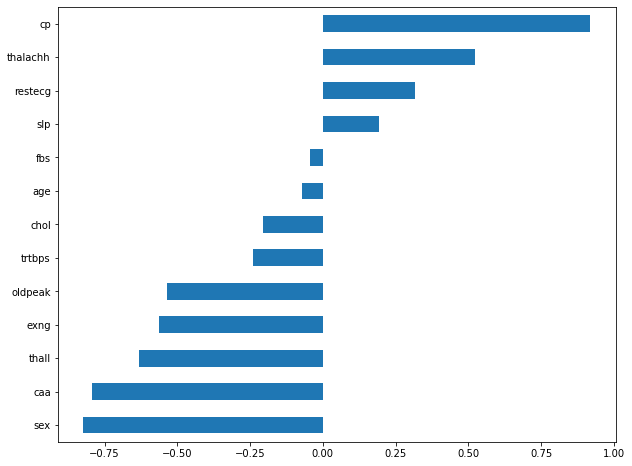

In [39]:
import matplotlib.pyplot as plt

model_lr = pipe.named_steps['logisticregression']
coefficients = pd.Series(model_lr.coef_[0], X_train.columns)
plt.figure(figsize=(10,8))
 coefficients.sort_values().plot.barh();

## 결정트리 모델
- 특성들을 기준으로 샘플을 분류해 나가는데 그 형태가 나무의 가지가 뻗어나가는 모습과 비슷해서 결정트리라는 이름을 가지고 있음
- 루트에 제일 중요한 특성이 위치하게 됨
- 분류와 회귀문제 모두 적용 가능
- 여러트리를 함께 사용하는 것이 앙상블 모델

In [43]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    #OneHotEncoder(use_cat_names=True), 
    #SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy') #best 파라미터를 쓰면 모든 경우의 수를 계산해게 됨
    #entropy 디폴트는 지니 
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  1.0
테스트 정확도:  0.6557377049180327


과적합 했음을 알 수 있다.

- 과적합 : 훈련데이터에서는 좋은 성능을 보이지만 테스트 데이터에서는 현저히 성능이 떨어지는 모델

- 과소적합 : 훈련데이터의 성능이 좋지않은 모델

In [44]:
y_test.value_counts(normalize=True)
#찍은 것 보다는 좀 나은듯

1    0.540984
0    0.459016
Name: output, dtype: float64

**만들어진 트리를 확인해보자**

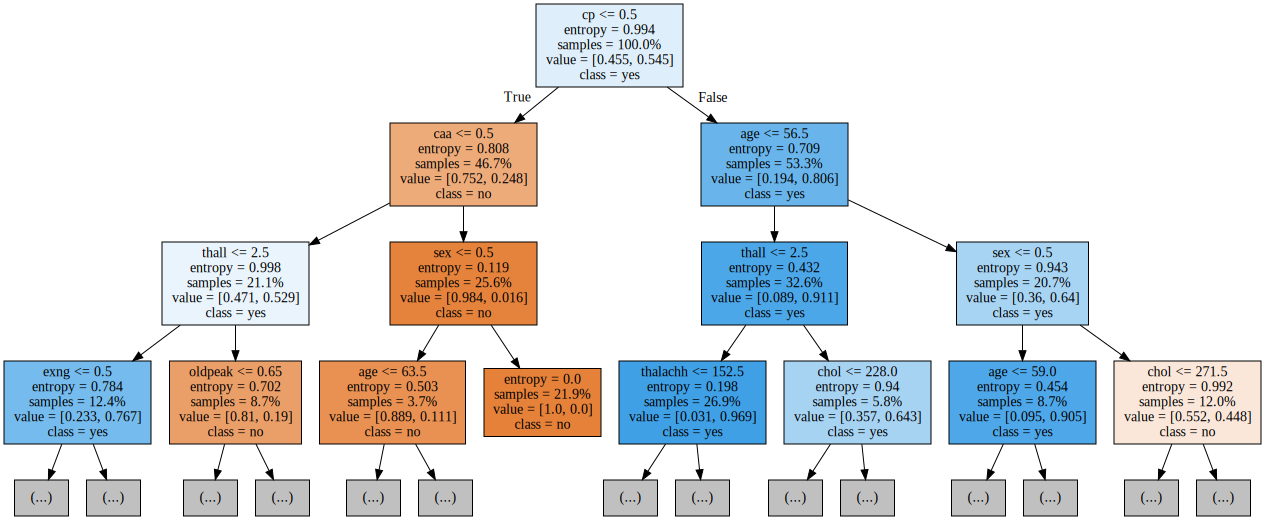

In [50]:
# graphviz 설치방법: conda install -c conda-forge python-graphviz
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
columns = X_test.columns

dot_data = export_graphviz(model_dt
                          , max_depth=3 #3층까지만, 안정해두면 너무 거대한 트리를 생성하게 됨
                          , feature_names=columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

#0.5라지만 float이라 이런거임 0,1로 나눠줘야하는디 ;! 상관은 없음

### 과적합을 해결하기 위해 파라미터를 이용해보겠음 

- min_samples_split : split할때, 나눌 때 걸리는 샘플의 갯수를 의미함, 100개보다 작으면 split 안하겠다.
- min_samples_leaf : 마지막 터미널 노드에서 최소한 샘플이 몇개 잇어야 한다
- max_depth : 트리 level

In [55]:
pipe = make_pipeline(
    
    DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('테스트 정확도', pipe.score(X_test, y_test))

훈련 정확도 0.8677685950413223
테스트 정확도 0.7377049180327869


완벽하진 않지만 과적합이 약간 해결되었고 약간의 성능이 올라갔음을 확인할 수 있다!!